In [1]:
import numpy as np
import sys
sys.path.append("../../..")
from utils.plotSimulationConvergence import plotSimulationConvergence, plotRelativeError
from matplotlib import pyplot as plt

In [2]:
def f(x):
    return np.e**(-x**2)
f = np.vectorize(f)

In [3]:
def monteCarloIntegration_UniformSampling(n, f, a, b):
    """It integrates the function f in the interval (a, b) using Monte Carlo Integration method with n samples drawn from an uniform between (a, b)."""
    integrationRange = (b-a)
    randomSample = np.random.rand(n) * integrationRange + a
    randomSample = f(randomSample)
    sampleMean = randomSample.mean()
    integration = integrationRange * sampleMean
    return integration

100%|██████████| 400/400 [00:00<00:00, 923.27it/s] 


(0.7, 0.8)

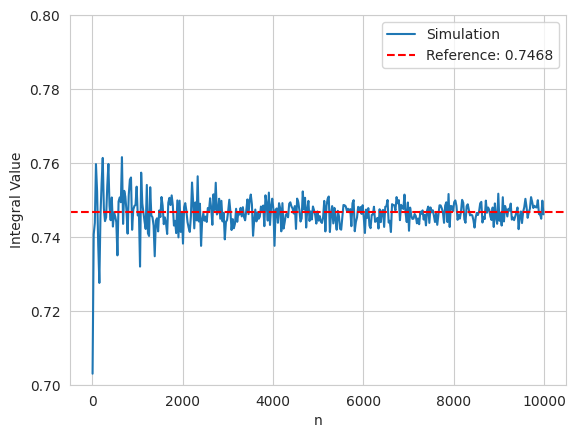

In [4]:
numericalMethodIntegration = 0.746824132 # https://www.integral-calculator.com/
plotSimulationConvergence(
    range(10,10000,25), 
    lambda n: monteCarloIntegration_UniformSampling(n, f, 0, 1), 
    numericalMethodIntegration
)
plt.ylabel("Integral Value")
plt.ylim([0.7, 0.8])

100%|██████████| 6/6 [00:00<00:00, 21.83it/s]


(0.0, 0.05)

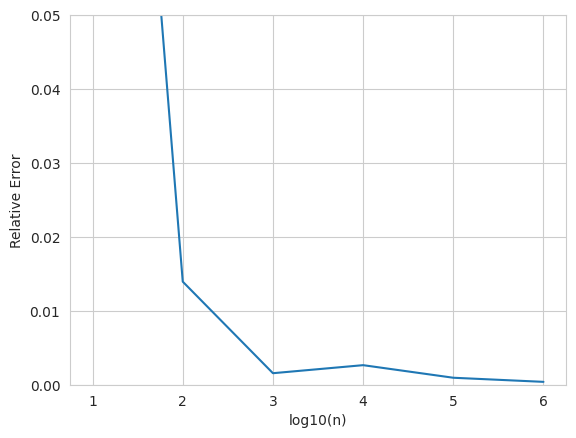

In [11]:
numericalMethodIntegration = 0.746824132 # https://www.integral-calculator.com/
nList = np.array([10**i for i in range(1,7)])
plotRelativeError(
    nList, 
    lambda n: monteCarloIntegration_UniformSampling(n, f, 0, 1), 
    numericalMethodIntegration
)
plt.xlabel("log10(n)")
plt.xscale("log")
plt.xticks(nList, labels=np.log10(nList).astype("int"))
plt.ylim([0, 0.05])